In [1]:
import numpy as np
from pathlib import Path
import uproot

from publik.weights import utils
from publik.reweight import custom_modifier

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(Path('../style.mplstyle'))
# matplotlib.style.use('default')
matplotlib.rcParams["text.usetex"] = False

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
q2json = '../pyhf_inputs/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_q2.json'

q2dist, q2binning = custom_modifier.getQ2Distributions(q2json)
q2binning_cut = np.where(q2binning > 0, q2binning, 0)
q2binning_cut = np.where(q2binning_cut < utils.kinlim(), q2binning_cut, utils.kinlim())
q2binning_cut = q2binning_cut[1:]

q2_pts_cent =  (q2binning_cut[:-1] + q2binning_cut[1:])/2

In [10]:
def mcdata(file):
    #These are generator level MC13a signal samples
    file = uproot.open(file)
    tree = file['tree_U4S_q2_gen']
    q2_gen = tree['q2_gen'].array(library='np')
    return q2_gen


file = 'mcsig.root'
q2_gen = mcdata(file)

In [11]:
q2_pts_cent

array([ 0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ,
        5.5       ,  6.5       ,  7.5       ,  8.5       ,  9.5       ,
       10.5       , 11.5       , 12.5       , 13.5       , 14.5       ,
       15.5       , 16.5       , 17.5       , 18.5       , 19.5       ,
       20.5       , 21.5       , 22.45128517])

In [12]:
phsp = utils.computePHSP(q2binning_cut)

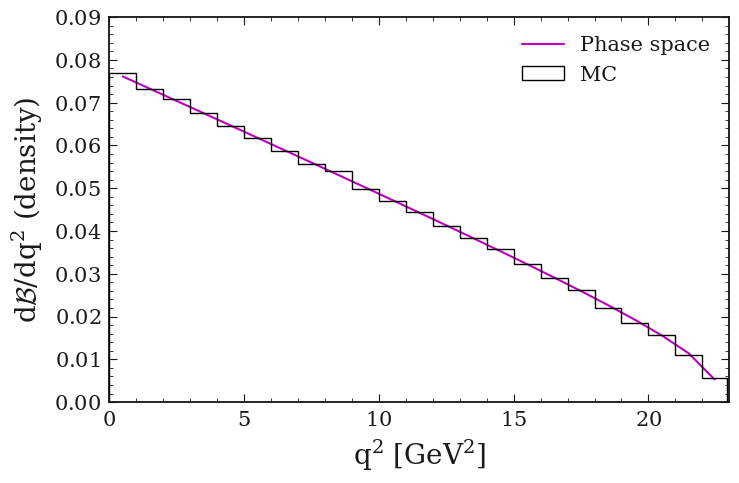

In [14]:
file = '../results/figs/mc_vs_phsp.pdf'


fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(q2_pts_cent, phsp, 'm-', label='Phase space')
ax.hist(q2_gen, q2binning_cut, label='MC', histtype='step', color='black', density=True)

ax.set_xlabel(r'$q^2$ [GeV$^2$]')
ax.set_xlim(0., 23.)
ax.set_ylabel(r'$d\mathcal{B}/dq^2$ (density)')
ax.legend(loc='upper right')

fig.savefig(file)
plt.show()